In [1]:
import os
from glob import glob

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.backend as K

In [2]:
path = 'mnist_png/mnist_png/training/0/1.png'
image = np.array(Image.open(path).convert('L'))
image = image.reshape(1, 28, 28, 1)

In [3]:
model = tf.keras.models.load_model('hdf5/mnist_cnn.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
preds = model.predict(image)

In [5]:
# index of the prediction
argmax = np.argmax(preds[0])

output = model.output[:, argmax]

In [6]:
for layer in model.layers:
    print(layer.name, layer)

input_1 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000199389268D0>
conv2d <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019938926C50>
activation <tensorflow.python.keras.layers.core.Activation object at 0x0000019938926E10>
conv2d_1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019938926FD0>
activation_1 <tensorflow.python.keras.layers.core.Activation object at 0x0000019938937208>
max_pooling2d <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000019938937240>
dropout <tensorflow.python.keras.layers.core.Dropout object at 0x0000019938937048>
conv2d_2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019938937518>
activation_2 <tensorflow.python.keras.layers.core.Activation object at 0x00000199389373C8>
conv2d_3 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019938937390>
activation_3 <tensorflow.python.keras.layers.core.Activation object at 0x0000019938937828>

In [7]:
last_conv_layer = model.get_layer('conv2d_3')

In [8]:
# Get Gradient
grads = K.gradients(output, last_conv_layer.output)[0]

In [9]:
grads

<tf.Tensor 'gradients/activation_3/Relu_grad/ReluGrad:0' shape=(?, 11, 11, 64) dtype=float32>

In [10]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))
pooled_grads

<tf.Tensor 'Mean:0' shape=(64,) dtype=float32>

In [11]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [12]:
pooled_grads_value, conv_layer_output_value = iterate([image])

In [13]:
for i, value in enumerate(pooled_grads_value):
    conv_layer_output_value[:, :, i] *= value

In [14]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\ma\core.py:713: UserW

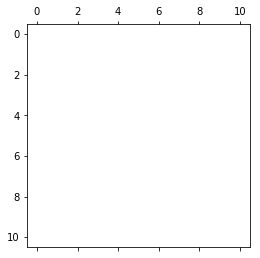

In [15]:
plt.matshow(heatmap)
plt.show()